<a href="https://colab.research.google.com/github/dhiranshinde/Multi-class-with-imbalanced-dataset-classification/blob/master/Question_Notebook_Finance_Annual_Report_RAG_QandA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

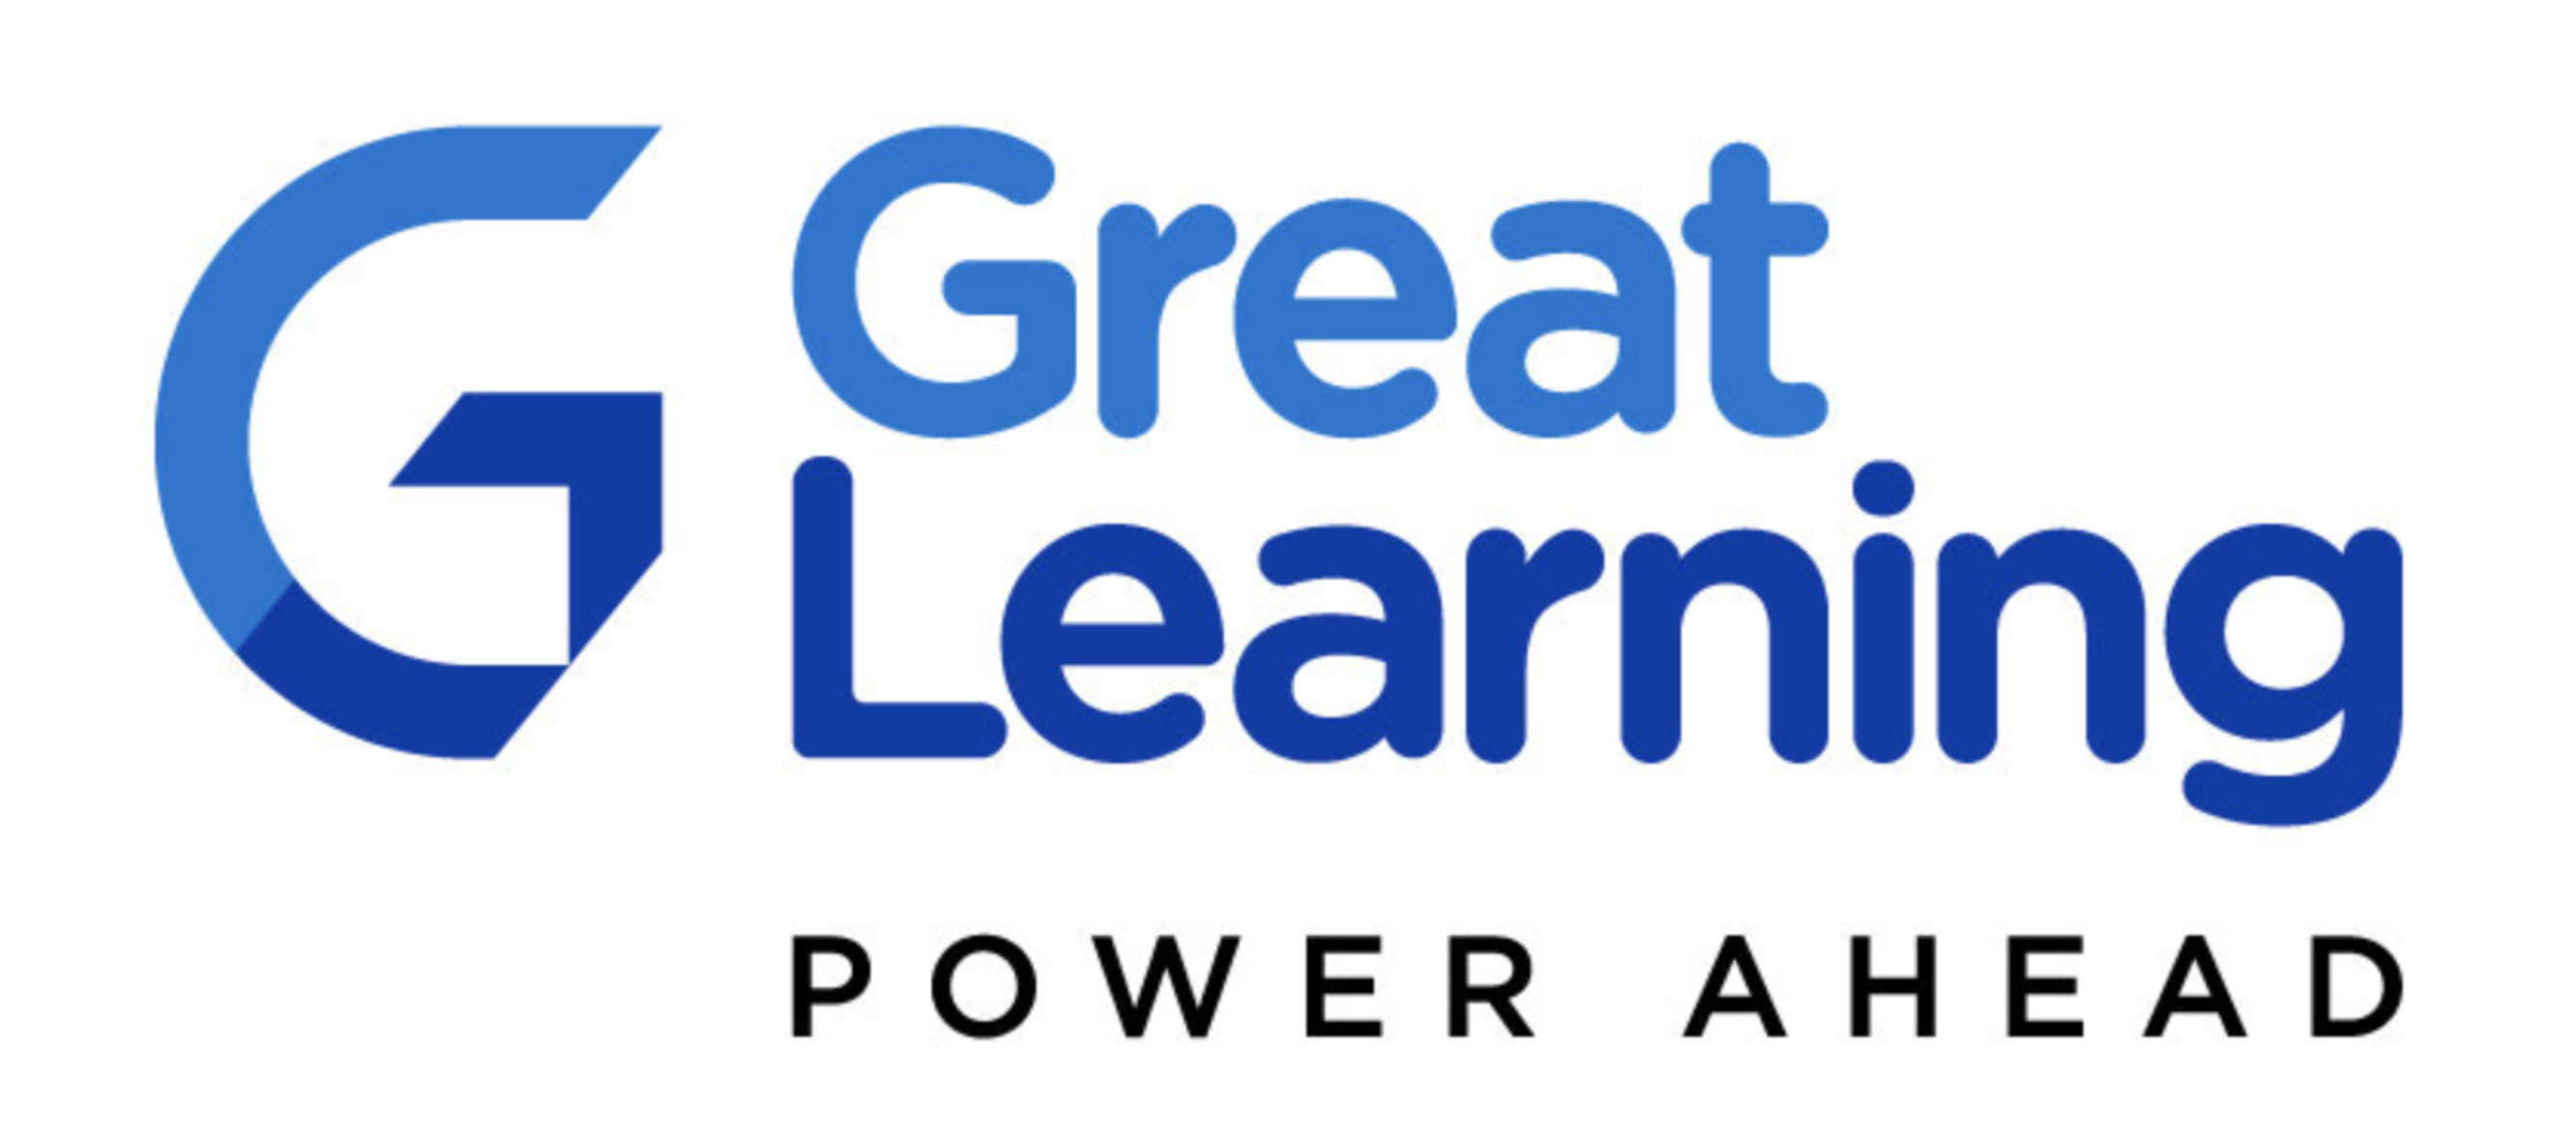

# **Generative AI - Semantic Search and Retrieval-Augmented Generation**

# **Annual Financial Report 2021-22 of the Ministry of Finance Government of India**

## **Business Context**

The Ministry of Finance's annual report for 2021-22 provides a comprehensive overview of India's financial landscape, focusing on economic policies, budget management, financial market regulation, and sectoral reforms. It highlights the Department of Economic Affairs' efforts in stabilizing the economy post-pandemic, including digital economy initiatives and infrastructure planning. The Department of Expenditure's role in optimizing public finances and procurement policies is detailed, alongside the Department of Revenue's tax administration enhancements. The report also underscores the Department of Investment and Public Asset Management's disinvestment achievements and policy initiatives, and the Department of Financial Services' work on financial inclusion and sectoral resilience during COVID-19. Collectively, the report emphasizes strategic fiscal management, regulatory reforms, and inclusive growth, providing a roadmap for India's economic recovery and future development.

## **Objectives**

You are tasked with providing key highlights and details for specific questions from this report for your organization. You will perform retrieval augmented generation using vector databases. Additionally, you will utilize prompt engineering and OpenAI models to provide a complete response. You will also evaluate the responses on groundness and relevance.

## **Setup**

In [ ]:
#install the required libraries
!pip install -q openai \
                tiktoken\
                pypdf\
                langchain \
                langchain-community\
                chromadb\
                sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 37.9 MB/s eta 0:00:0

In [ ]:
#import the required libraries
import json
import tiktoken
import gdown

import pandas as pd

from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings
)
from langchain_community.vectorstores import Chroma

In [ ]:
#Add your Azure OpenAI credentials
from google.colab import userdata
ENDPOINT_URL = userdata.get('ENDPOINT_URL')
DEPLOYMENT_NAME = userdata.get('DEPLOYMENT_NAME')
AZURE_OPENAI_API_key = userdata.get('AZURE_OPENAI_API_KEY')
api_version = userdata.get('api_version')

In [ ]:
from openai import AzureOpenAI

In [ ]:
#Create Azure OpenAI client with your credentials
client = AzureOpenAI(
    azure_endpoint=ENDPOINT_URL,
    api_key=AZURE_OPENAI_API_key,
    api_version=api_version
)

## **Retrieval-Augmented Generation (RAG)**

**An important application of LLMs is enabling users to query unstructured data in natural language.** This is finding a lot of traction in industries where the data is naturally unstructured in nature (e.g., finance, healthcare).

The figure below shows how the finance sector is utilizing LLMs to query and summarize documents.

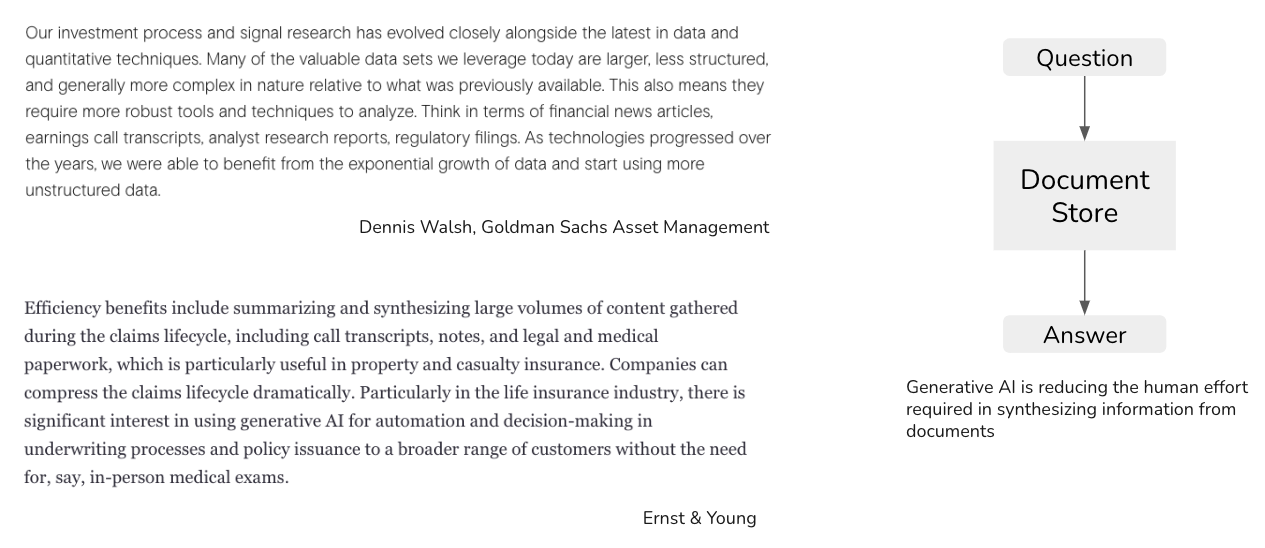

Document-based Q&A is achieved using Retrieval-Augmented Generation (RAG). RAG is a technique that combines the capabilities of pre-trained large language models (LLMs) with external data sources to generate more accurate and informative text. The key ideas are:

1. Bridging the gap between generative models and external knowledge: RAG integrates LLMs, which excel at generating fluent text, with retrieval models that can access and incorporate relevant information from external knowledge bases or databases.

2. Improving contextual understanding and content generation: By accessing external information, RAG models can generate text that is not only fluent but also grounded in real-world knowledge, leading to more accurate and contextually relevant responses. This is particularly useful for tasks like question-answering, summarization, and dialogue systems.

3. Reducing bias and misinformation: RAG can help verify generated content against external sources, incorporating diverse perspectives and producing more balanced and factually accurate outputs. This helps address issues of bias and misinformation that can arise in standalone LLMs.

4. Flexibility and scalability: RAG architectures are designed to be flexible and adaptable, allowing them to leverage domain-specific knowledge bases and scale effectively to handle large-scale information sources.

5. Continuous learning and improvement: RAG systems can be designed to continuously learn and improve over time by incorporating feedback mechanisms and iterative refinement processes. This contributes to the long-term effectiveness and reliability of RAG-powered applications.

In summary, RAG combines the strengths of generative language models and retrieval models to produce text that is more accurate, contextually relevant, and grounded in external knowledge, addressing key limitations of standalone LLMs.

The figure below summarizes the key idea of RAG.

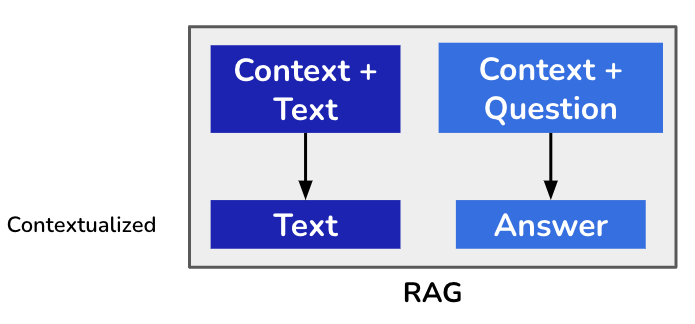

## **The Building Blocks of RAG**

## **A Workflow for RAG**

The figure below depicts the key stages involved in designing a RAG solution using LLMs. Let us look at each stage in detail.

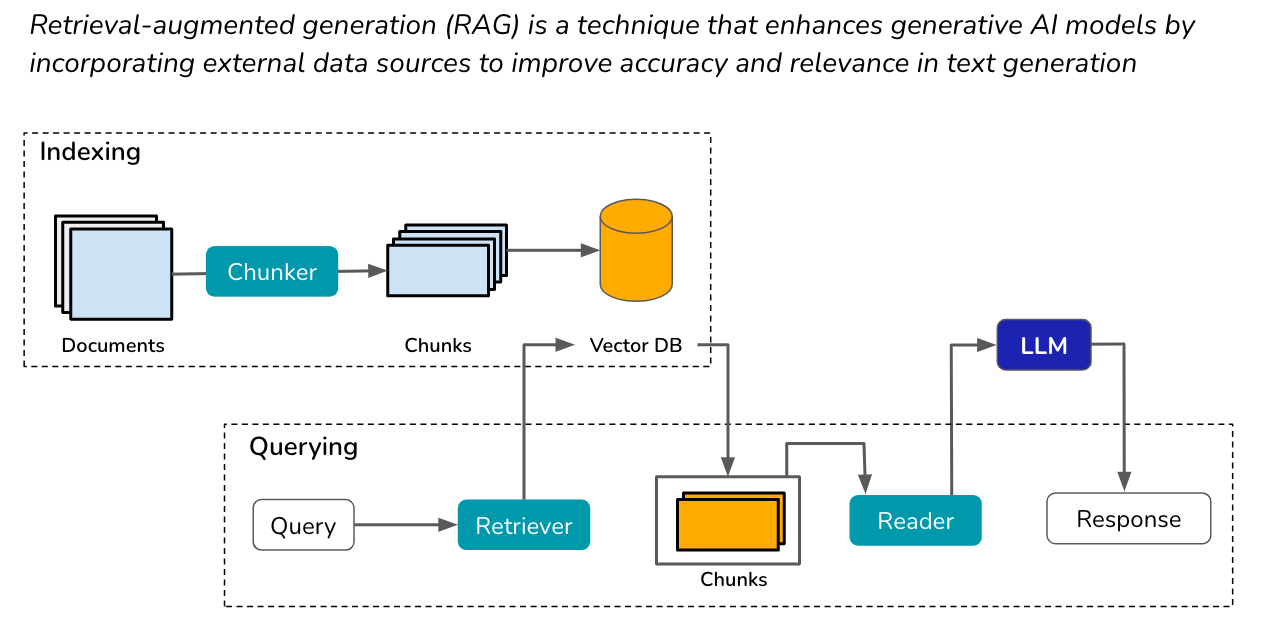

**Indexing**

In the first step, we ingest the different sources of data into a document database. At this stage, the focus is on assembling all the data (irrespective of format, e.g., text, pdf) relevant to the use case and data exists in the raw unmodified form. However, given context window limitations of LLMs, we cannot stuff all the documents in the database as context. Even if we did have an infinite context window, the LLM would find it difficult to provide a coherent answer while sifting through the noise for the signal. To avoid this situation, we will need to carefully select documents that relate to the user input so the LLM can be tasked to answer based only on the context.

A key method to aid retrieval of relevant documents is to convert the ingested raw data into a vector representation. This way, we can compare the query (converted into a vector) with the document vectors and choose only those documents that are similar to the query. This process of creating a vector representation from input text is called embedding and is achieved using embedding models (for e.g., SentenceTransformer). Once embeddings are created they can be stored for efficient retrieval in specialized vector data stores such as Pinecone or ChromaDB (we use ChromaDB in this notebook).


While embeddings solve for retrieval of appropriate context given a query, a more efficient application of vectorization is to transform raw data into smaller chunks before feeding it to an embedding model. There are two important reasons why this is needed:

- Embedding models are themselves Transformer models and hence have input length constraints. Any text that is longer than the maximum input length allowed by the embedding model is usually truncated.
- Slicing the data into chunks facilitates fine-grained control on the specific information that can be injected as context. This helps the model focus only on the information most relevant to the query.

**Retrieval**

In the second step, a prompt is dynamically assembled when a user input is received. This user input is converted to a vector representation using the same model that was used for the context chunks. Then a similary search is executed against the vectorized chunks in the vector database. Top-$k$ chunks from the search results in this step are then stuffed into the prompt as the context and the LLM is instructed to answer the user query using only the context.

To facilitate indexing and retrieval, abstractions such a chunkers, retrievers and readers are used that interface with the document database, vector database and the LLM respectively. Popular packages that implement these abstractions are `langchain` and `llamaindex`.

Now that we have an overview of the process, let us take a deeper look at each of these steps.

## **Step 1: Creating a Vector Database (Indexing)**

We create a vector database by chunking the input document and then associating each chunk with a vector using an embedding model. The overall process is described in the figure below.

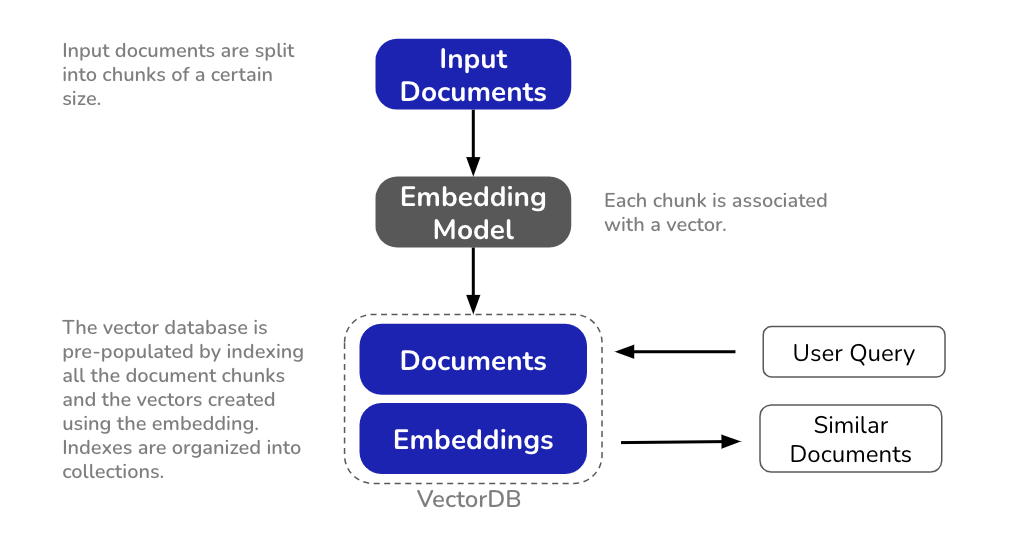

As the above figure indicates, there are two important components of vector database creation that merit a deeper look - choice of embedding model and chunking.

## **Choosing an embedding model**

Let us first recap what embeddings are:

- Embeddings are a type of word representation that allows words with similar meaning to have a similar representation.
- They capture semantic properties of words and relations with other words.


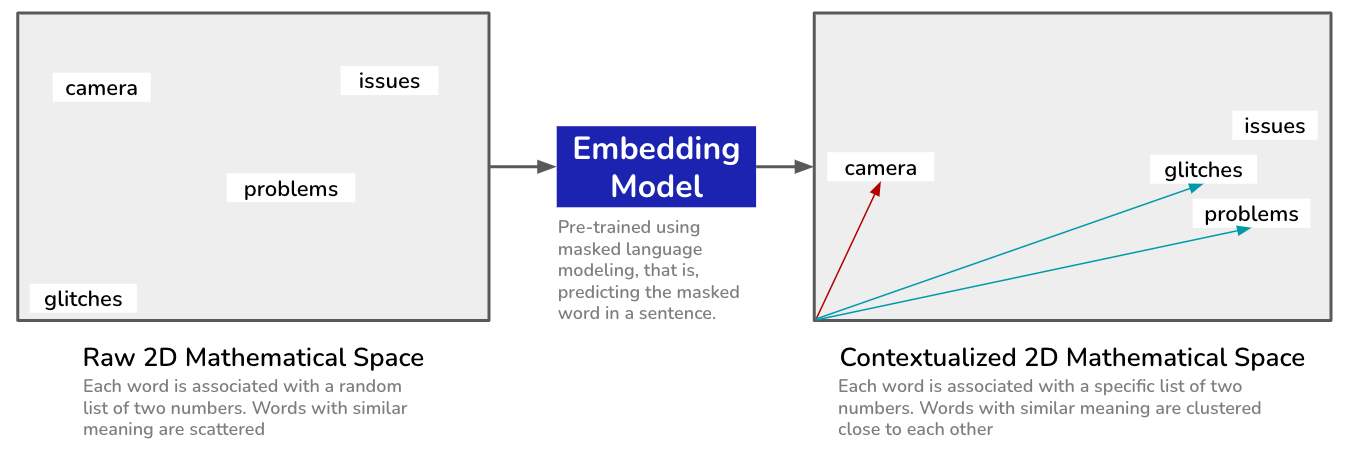

Similar to word embedding models, sentence embedding models represent the meaning of whole sentences. They are derived by averaging word embeddings or using specialized embedding models.

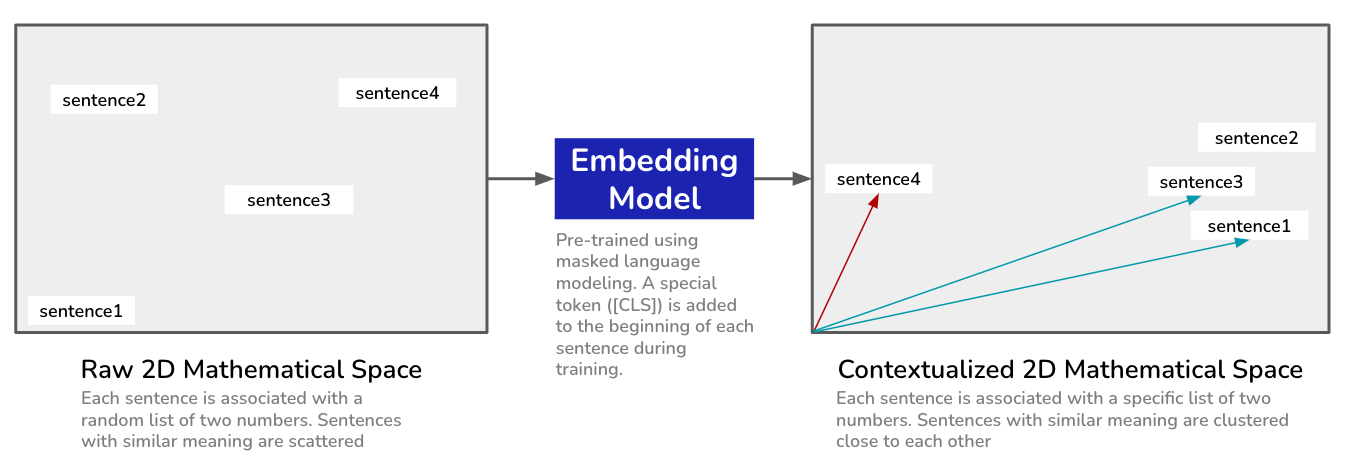

Good embedding models encode text into vector representations that act as good features for the downstream LLM tasks (for e.g., in this case, retrieval). However, there are many embedding models to choose from (both free and paid) and the choice is not often not straight forward. Moreover, there is no evidence that free/open-source embedding models (for e.g., models hosted on HuggingFace) are less effective compared to paid models (for e.g., from Open AI).

A good method to choose an embedding model, is to use the [embedding leaderboard](https://huggingface.co/spaces/mteb/leaderboard) and select an open source model that is performant for the use case at hand.

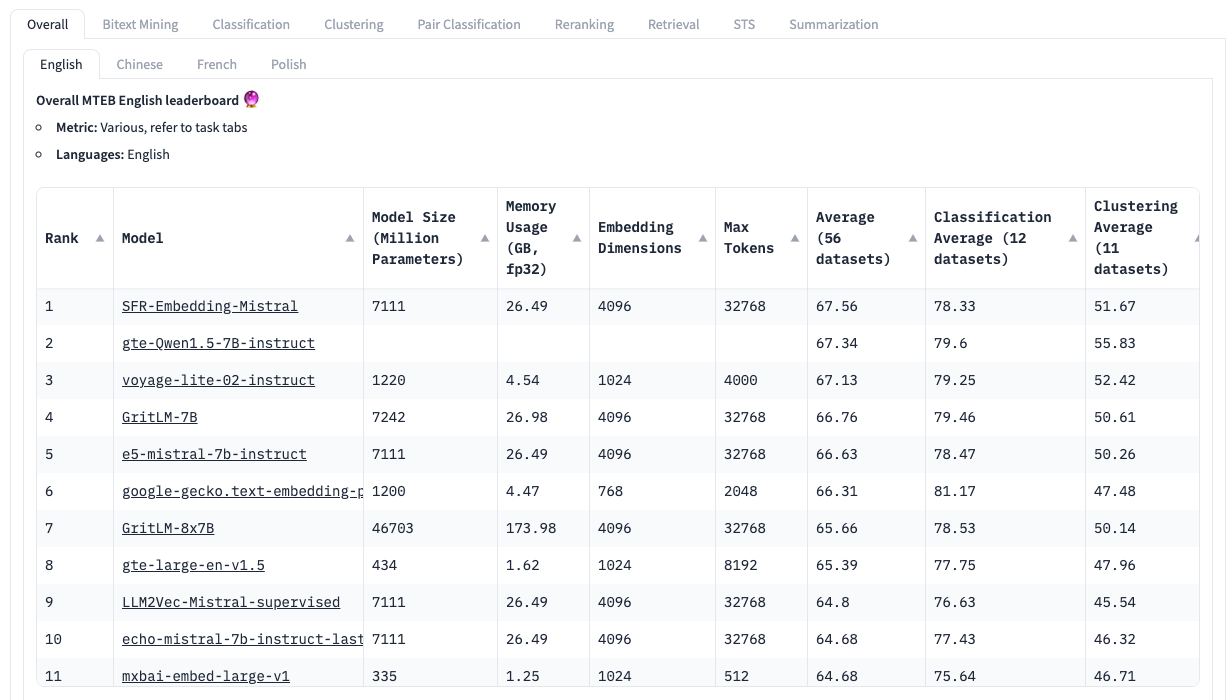

A good general purpose embedding model is [`gte-large`](https://huggingface.co/thenlper/gte-large).

## **Chunking documents**

Once the choice of embedding model is made, we can feed the input documents to the model. However, since there are multiple pages across documents (including figures, tables) we will need a method to parse individual portions of the document that is aligned with the embedding model.

We also know that the embedding model cannot process text beyond a fixed context length (512 tokens for `gte-large`). This roughly corresponds to about 400 words or about 1 page of text. With this limitation in mind, we will transform the pdf file into chunks of text that are no more than 512 chunks long. An alternative method would be to chunk the file by sections in the report (e.g., risk factors, legal proceedings, safety disclosures).

A common chunking strategy is to used a fixed-size chunk as defined by the embedding model and use a small overlap between the chunks (see figure below).


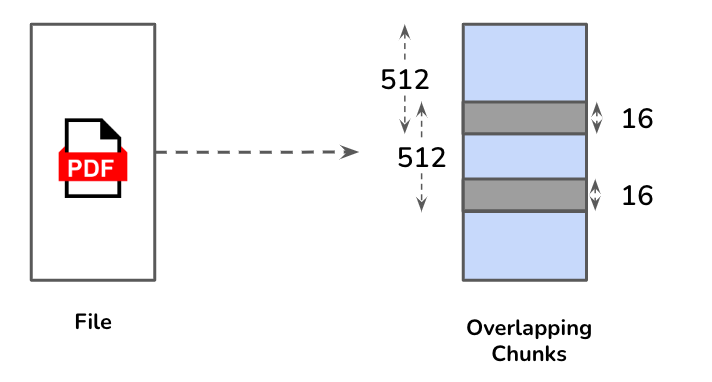

Using an overlap allows for continuity between chunks and retrieval of relevant chunks even when the information relevant to the query is present either at the beginning of the chunk or the end of the chunk.

With an embedding model and chunking strategy in place, we can set up an information processing pipeline, where each document is parsed into a Python runtime, chunked and passed to the embedding model. The document chunk and embedding is then stored as an entry in the vector database.

Note that the vector databases themselves are full fledged databases. They support the entire gamut of Create, Read, Update and Delete (CRUD) operations. In this notebook, we will use `langchain` abstractions to chunk and create a persistent database. Refer to the [Chroma DB documentation](https://docs.trychroma.com/api-reference) for an overview on CRUD operations.

## **Step 2: Querying the Vector Database**

Once the vector database is set up, embedding generated from the query text is compared with all the document embeddings in the vector database. The most similar documents are then retrieved and presented along with the original query in the prompt.

Finally, in the prompt, we instruct the LLM to focus only on the context to answer the user query. The key idea here is that both the query and the context are both dynamically injected into the prompt.

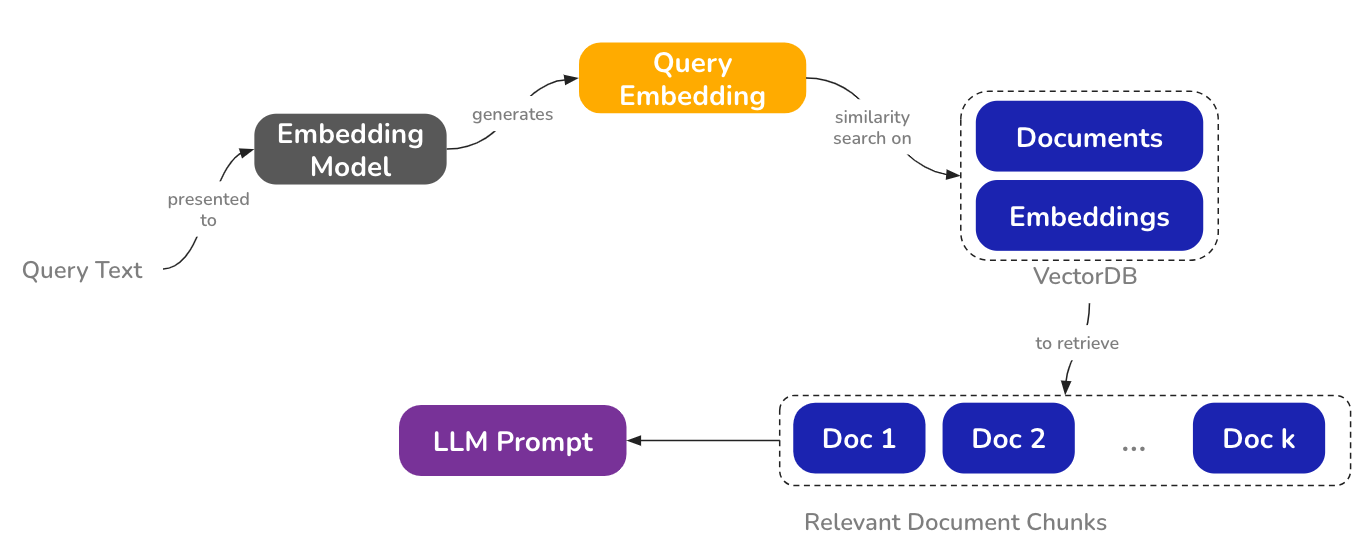

## **Evaluation**

Since RAG is just a special case of text-to-text generation, evaluation is no different from what we saw before. We either use human baselines or use LLM-as-a-judge to evaluate RAG workflows.

However, since RAG systems have two components (indexing and retrieval), they are usually judged on [two important parameters](https://docs.ragas.io/en/stable/concepts/metrics/index.html#ragas-metrics):
- **Groundedness/Faithfulness:** How much of the answer is drawn from the context?
- **Relevance:** How relevant is the answer to the query, given the context?

These two metrics check the quality two components of the RAG system - retrieval and generation. To evaluate these components individually, it is common to use the LLM-as-a-judge method to check the quality of the RAG system. We write two prompts corresponding to each of these metrics and using the user input, context and answer, evaluate the performance of the RAG system.

Just like in the case of evaluation of classification and summarization, it is critical to create a pool of gold examples that reflect the user intent.

## **Implementing RAG**

## **1 - Loading the PDF, Chunking**

In [26]:
#Add the pdf file
pdf_folder_location = "Annual Report"

In [27]:
#from google.colab import drive
#drive.mount('/content/drive')

In [28]:
#load the pdf file
pdf_loader = PyPDFDirectoryLoader(pdf_folder_location)

In [29]:
#Create the Tokenizer and encoder for the data
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap=16
)

In [30]:
#Tokenize and encode the data. Apply a chunking stategy
tesla_10k_chunks = pdf_loader.load_and_split(text_splitter)

In [31]:
#Print the length of the  data
len(tesla_10k_chunks)

834

## **2 - Vector Store - ChromaDB, Embeddings**

In [32]:
#Create a collection name
tesla_10k_collection = 'Annual-Report-2025'

In [33]:
#Load an embedding model
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')

<ipython-input-33-3a3d890f2c8c>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [34]:
#Add the data to the vector database
vectorstore = Chroma.from_documents(
    tesla_10k_chunks,
    embedding_model,
    collection_name=tesla_10k_collection,
    persist_directory='./tesla_db'
)

In [35]:
vectorstore.persist()

<ipython-input-35-ccfd33473261>:1: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


In [36]:
vectorstore_persisted = Chroma(
    collection_name=tesla_10k_collection,
    persist_directory='./tesla_db',
    embedding_function=embedding_model
)

<ipython-input-36-c11fb5dac521>:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore_persisted = Chroma(


In [37]:
retriever = vectorstore_persisted.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 5}
)

In [ ]:
#Create a retriever to obtain data from the vector database

## **3 - RAG Q&A**

### **Prompt Design**

In [38]:
#Create a system message for your prompt
qna_system_message = """
You are an assistant to a financial services firm who answers user queries on annual reports.
User input will have the context required by you to answer user questions.
This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Please answer user questions only using the context provided in the input.
Do not mention anything about the context in your final answer. Your response should only contain the answer to the question.

If the answer is not found in the context, respond "I don't know".
"""

In [39]:
#Create a question and answer template for your prompt
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
"""

### **Retrieving the Relevant Documents**

In [40]:
user_input = "What was the annual revenue of the company in 2022?"

In [41]:
#Retrieve the top 5 similar chunks from the data
relevant_document_chunks = retriever.get_relevant_documents(user_input)

<ipython-input-41-d722f024936a>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  relevant_document_chunks = retriever.get_relevant_documents(user_input)


In [42]:
#print the length of the retrieved data
len(relevant_document_chunks)

5

In [43]:
#print the data
for document in relevant_document_chunks:
    print(document.page_content.replace("\t", " "))
    break

as compared to `4133.38 crores (regrouped) for the year
2019-20. Profit before Tax (PBT) from continuing
operations for the year 2020-21 is `789.74 crores as
compared to `1176.69 crores (regrouped) for the year
2019-20. The Company had achieved a Total
dhshinde@deloitte.com
dhshinde@deloitte.com
This file is meant for personal use by dhshinde@deloitte.com only.
Sharing or publishing the contents in part or full is liable for legal action.


### **Defining the RAG function for response**




In [46]:
#Create a RAG function using OpenAI model to output a complete response

In [47]:
model_name = DEPLOYMENT_NAME

In [50]:
user_input = "What was the annual revenue of the company in 2022"

In [51]:
#print the response of the above user input
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

try:
    response = client.chat.completions.create(
        model=model_name,
        messages=prompt,
        temperature=1
    )

    prediction = response.choices[0].message.content.strip()
except Exception as e:
    prediction = f'Sorry, I encountered the following error: \n {e}'

print(prediction)

I don't know.


In [52]:
user_input = "Provide the financials for the agricultural sector in the year 2021-22."

In [53]:
#print the response of the above user input
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

try:
    response = client.chat.completions.create(
        model=model_name,
        messages=prompt,
        temperature=1
    )

    prediction = response.choices[0].message.content.strip()
except Exception as e:
    prediction = f'Sorry, I encountered the following error: \n {e}'

print(prediction)

I don't know.


In [54]:
user_input = "What are the World Trade Volume projections over the years?"

In [55]:
#print the response of the above user input
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

try:
    response = client.chat.completions.create(
        model=model_name,
        messages=prompt,
        temperature=1
    )

    prediction = response.choices[0].message.content.strip()
except Exception as e:
    prediction = f'Sorry, I encountered the following error: \n {e}'

print(prediction)

The World Trade Volume projections are as follows:
- 2021: 9.3%
- 2022: 6%
- 2023: 4.9% 
The difference from October 2021 is -0.7% for 2022 and +0.4% for 2023.


In [56]:
user_input = "Provide the key highlights from the financials of the Department of Public Enterprises"

In [57]:
#print the response of the above user input
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

try:
    response = client.chat.completions.create(
        model=model_name,
        messages=prompt,
        temperature=1
    )

    prediction = response.choices[0].message.content.strip()
except Exception as e:
    prediction = f'Sorry, I encountered the following error: \n {e}'

print(prediction)

1. The overall net profit of 255 operating Central Public Sector Enterprises (CPSEs) increased by 69.48% to ₹1.58 lakh crore in 2020-21 from ₹0.93 lakh crore in 2019-20.
2. The contribution of CPSEs to the Central Exchequer increased by 31.14% to ₹4.96 lakh crore in 2020-21 compared to ₹3.79 lakh crore in the previous year.
3. The net profit of 177 profit-making CPSEs was ₹1,89,320 crore in 2020-21.
4. The net loss of 77 loss-making CPSEs stood at ₹(-)31,058 crore during the year.
5. The gross revenue from operations of CPSEs decreased by 1.30% from ₹24,58,028 crore in 2019-20 to ₹24,26,045 crore in 2020-21.
6. Total paid-up capital of all CPSEs increased by 3.42% to ₹3,21,070 crore in 2020-21.
7. The investment (equity plus long-term loans) of all CPSEs rose to ₹21,67,479 crore in 2020-21, a growth of 1.85%.
8. Capital employed of all CPSEs increased by 4.84% to ₹32,46,696 crore in 2020-21.
9. Reserves and surplus of all CPSEs increased by 11.40% to ₹10,79,216 crore in 2020-21.
10. Th

In [58]:
user_input = "What were the revised targets for small finance banks?"

In [59]:
#print the response of the above user input
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

try:
    response = client.chat.completions.create(
        model=model_name,
        messages=prompt,
        temperature=1
    )

    prediction = response.choices[0].message.content.strip()
except Exception as e:
    prediction = f'Sorry, I encountered the following error: \n {e}'

print(prediction)

The revised targets for Small Finance Banks are as follows: 
- Total Priority Sector: 40%
- Agriculture: 18%, out of which a target of 10% is prescribed for Small and Marginal Farmers (SMFs)
- Micro Enterprises: 7.5%
- Advances to Weaker Sections: 12%


In [60]:
user_input = "Provide a summary of the department of economic affairs."

In [61]:
#print the response of the above user input
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

try:
    response = client.chat.completions.create(
        model=model_name,
        messages=prompt,
        temperature=1
    )

    prediction = response.choices[0].message.content.strip()
except Exception as e:
    prediction = f'Sorry, I encountered the following error: \n {e}'

print(prediction)

The Department of Economic Affairs is responsible for advising the government on economic policy, monitoring domestic and external economic developments, and providing policy measures for macro management in agriculture, industry, and infrastructure. It produces the annual Economic Survey, which evaluates the performance of the Indian economy and is presented before Parliament prior to the Union Budget. Additionally, the department issues a monthly economic report and prepares analytical notes on significant policy issues. It engages with international institutions and collaborates with various governmental bodies for effective economic management.

The department also focuses on staff training, having nominated 316 officials for training in various institutes in 2021. It has a centralized public grievances redressal system, receiving and addressing a significant number of public grievance cases. The department complies with the Right to Information Act, facilitating information dissem

## **4 - Evaluation**

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation. We illustrate this evaluation based on the answeres generated to the question from the previous section.

In [ ]:
#define a rater model
#rater_model = 'gpt-35-turbo' # 'gpt-4'

In [62]:
#Create a groundedness rater system message
groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.
"""

In [63]:
#Create a relevance rater system message
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.
"""

In [64]:
#Create a user message template
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [65]:
user_input = "What was the production of rice in 2020-21?"

In [66]:
#Obtain relevant data chunks
relevant_document_chunks = retriever.get_relevant_documents(user_input)
context_list = [d.page_content for d in relevant_document_chunks]
context_for_query = ". ".join(context_list)

In [ ]:
#obtain the response for the user input


In [67]:
#print the response
print(context_for_query)

1 per cent growth respectively during 2019-20. During
April-November 2021-22, the IIP grew by 17.4 per cent.
The growth of different used based industrial group is
given below.
1 Horticulture crops comprising of fruits, vegetables, aromatic and medicinal, flowers, honey, plantat ion and spices.
Table 3 : Growth of Index of Industrial Production (IIP) (in Per cent) 
(Base 2011-12=100) 
Industry Group Weight 2019-20 2020-21 2021-22(April-
November) 
Mining 14.37 1.6 -7.8 18.2 
Manufacturing 77.63 -1.4 -9.6 18.5 
Electricity 7.99 1.0 -0.5 10.2 
 
Table 2: Production of Major Agricultural Crops (2nd Advance Estimates) 
Production (Million Tonnes) 
Crops 2015-16 2016-17 2017-18 2018-19 2019-20 
 
2020-21 
 
2021-22 
(2nd A.E) 
Total food-grains 251.5 275.1 285.0 285.2 297.5 310.7  316.1 
Rice 104.4  109.7  112.8 116.5  118.4 124.4  127.9 
Wheat  92.3 98.5  99.9 103.6  107.6 109.6  111.3 
Total Coarse 
Cereals 38.5  43.8 47.0 43.1 47.8 51.3  
49.9 
Total Pulses 16.3  23.1  25.4  22.1 23.0 25

In [68]:
#Create the groundedness prompt
prompt = [
    {'role':'system', 'content': qna_system_message},
    {'role': 'user', 'content': qna_user_message_template.format(
         context=context_for_query,
         question=user_input
        )
    }
]

response = client.chat.completions.create(
    model=model_name,
    messages=prompt,
    temperature=0
)

answer = response.choices[0].message.content.strip()

In [69]:
#print the evaluation of the response on groundedness
print(answer)

The production of rice in 2020-21 was 124.4 million tonnes.


In [70]:
#Create the relevance prompt
groundedness_prompt = [
    {'role':'system', 'content': groundedness_rater_system_message},
    {'role': 'user', 'content': user_message_template.format(
        question=user_input,
        context=context_for_query,
        answer=answer
        )
    }
]

In [71]:
#print the evaluation of the response on Relevance
response = client.chat.completions.create(
    model=model_name,
    messages=groundedness_prompt,
    temperature=0
)

print(response.choices[0].message.content)

### Steps to Evaluate the Answer
1. Identify the specific information requested in the question.
2. Review the context provided to find relevant data regarding rice production for the year 2020-21.
3. Compare the AI-generated answer with the information found in the context to determine if it is accurate and derived solely from the context.
4. Assess the extent to which the answer adheres to the metric that it should be derived only from the context.

### Step-by-Step Explanation
1. The question asks for the production of rice in the year 2020-21.
2. In the context, there is a table that lists the production of major agricultural crops, including rice. The relevant data states that the production of rice in 2020-21 is 124.4 million tonnes.
3. The AI-generated answer states, "The production of rice in 2020-21 was 124.4 million tonnes." This matches the information found in the context.
4. The answer is directly derived from the context without introducing any external information or ass

## Conclusion

Provide a conclusion based on your results.

# Happy learning!